In [1]:
import pickle
import numpy as np

In [2]:
# load the model from disk
loaded_model = pickle.load(open('ovr_logistic_regression_model.sav','rb'))


In [3]:
loaded_model

LogisticRegression(multi_class='ovr')

In [6]:
x_test=np.loadtxt("x_features_test.txt")

In [9]:

xs_test = x_test.shape
x_new_test = np.zeros((xs_test[0], xs_test[1]+1))
x_new_test[:, :-1] = x_test
x_new_test[:,-1]=((x_test[:,14]-x_test[:,11])/(x_test[:,5]-x_test[:,2]))
x_new_test[np.isinf(x_new_test)]=0.0

/Users/gwattal/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


In [11]:
x_new_test.shape

(1277, 51)

In [18]:
with open("y_labels_test.txt", "r") as fp:
    y_test = [x[:-1] for x in fp.readlines()]

In [20]:
result = loaded_model.score(x_new_test, y_test)
print(result)

0.6844166014095536


Normalized confusion matrix
[[0.48669202 0.51330798 0.        ]
 [0.25518672 0.74481328 0.        ]
 [0.         0.27255639 0.72744361]]


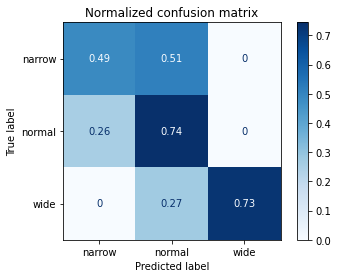

In [26]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
# Plot non-normalized confusion matrix
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(loaded_model, x_new_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.savefig('confusion_matrix_ovr_logistic01.png')